In [1]:
from pathlib import Path

from darwin.torch.dataset import InstanceSegmentationDataset
from darwin.torch.transforms import ConvertPolygonsToInstanceMasks

In [2]:
root = Path('/Users/andrea/.darwin/datasets/complex')
split = Path('/Users/andrea/.darwin/datasets/complex/lists/split/random_train.txt')
with open(split, 'r') as f:
    for line in f:
        print(line)
dataset = InstanceSegmentationDataset(root, split)

1



In [3]:
dataset[0]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080 at 0x12E9A0358>,
 {'boxes': tensor([[ 799.8100,  289.5000,  974.3300,  564.4800],
          [1143.8900,  162.3400, 1355.1500,  379.9700]]),
  'labels': tensor([1, 1]),
  'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]],
  
          [[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'image_id': tensor([0]),
  'area': tensor([53945.0625, 37230.7422]),
  'iscrowd': tensor([0, 0])})

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)
torch.Size([1080, 1920])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)


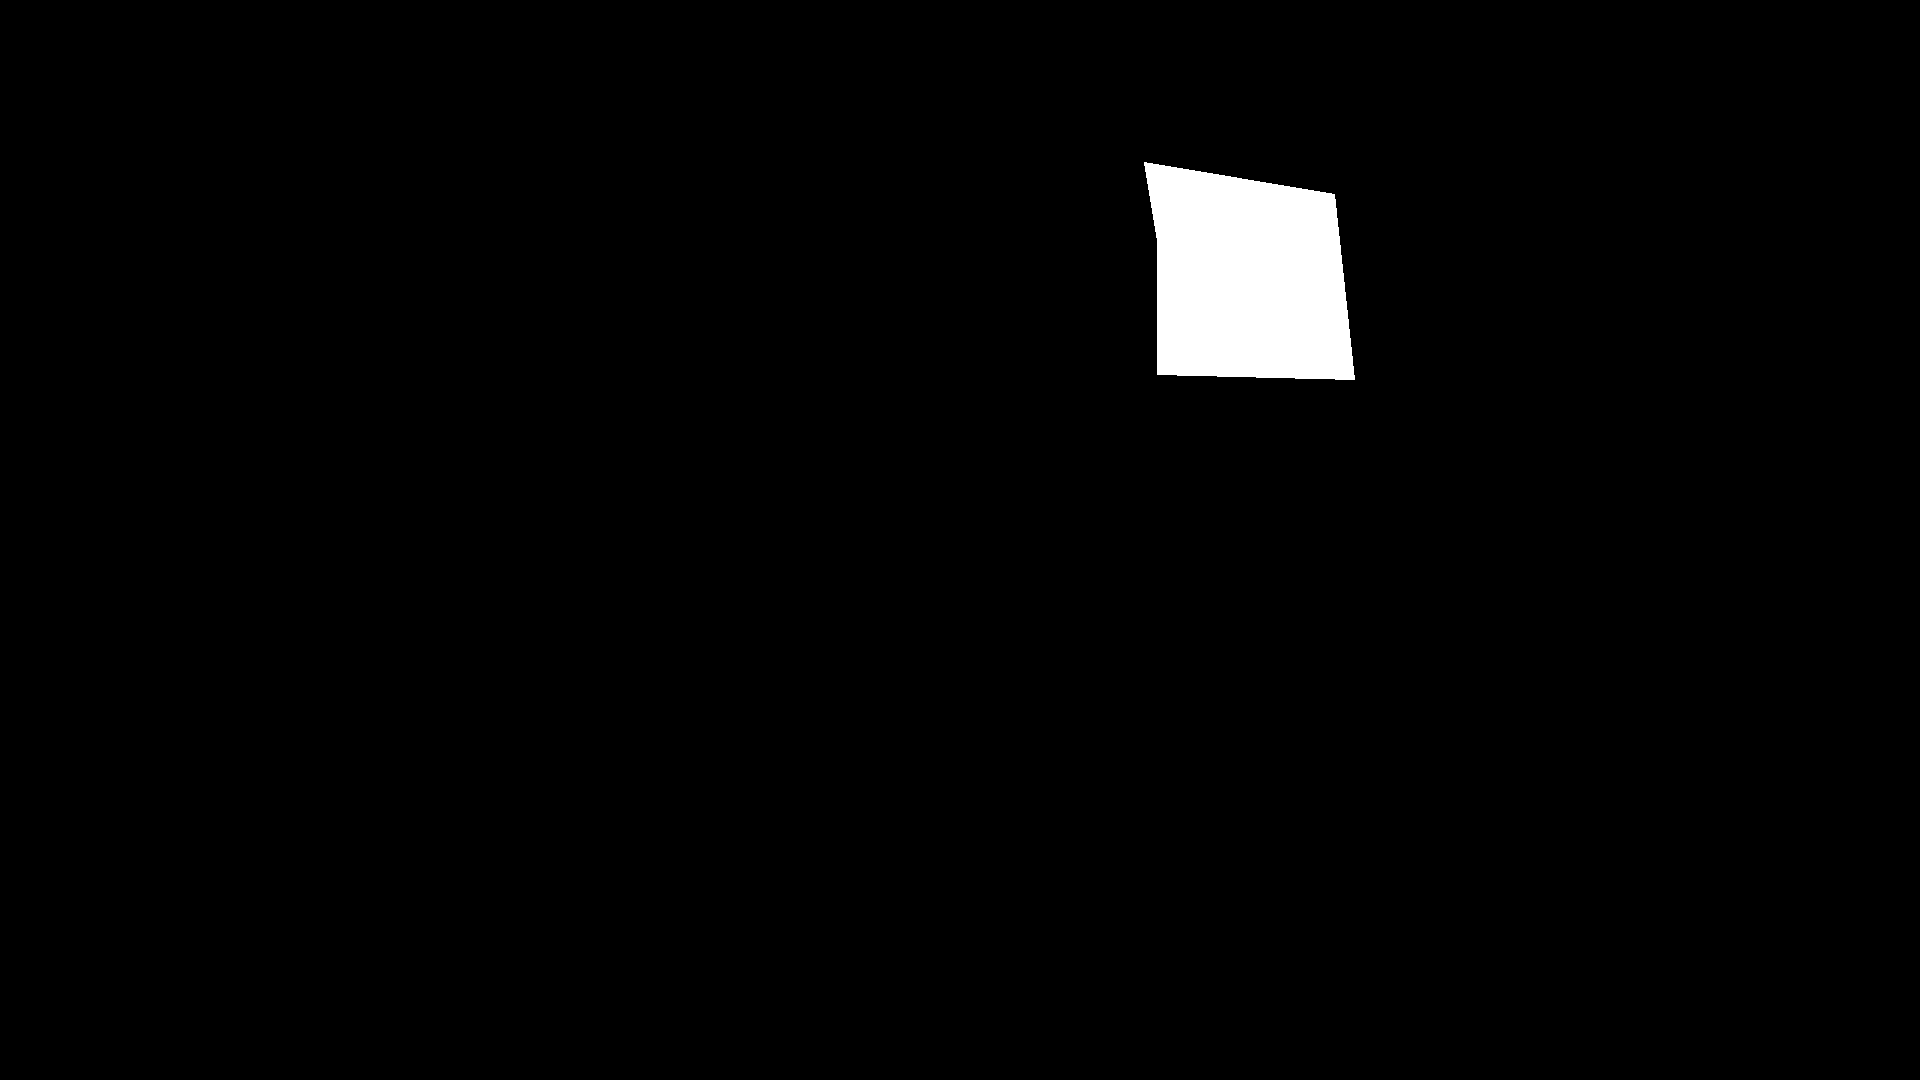

In [6]:
import torch
import torchvision.transforms as transforms

transforms.ToPILImage()(dataset[0][1]['masks'][1] * 255)

In [7]:
import numpy as np
segmentation = [[np.array([851.98, 368.18, 851.98, 346.65, 840.22, 346.65, 837.43, 349.45,
       837.43, 350.84, 836.63, 350.84, 836.63, 349.45, 830.45, 349.45,
       826.27, 350.84, 826.27, 353.63, 824.87, 359.21, 824.87, 364.79,
       823.48, 370.38, 823.48, 382.14, 824.87, 384.93, 824.87, 387.72,
       826.27, 389.11, 827.66, 389.11, 833.24, 391.9 , 843.61, 391.9 ,
       846.4 , 386.32, 847.8 , 382.14, 850.59, 376.56, 850.59, 370.97]), np.array([930.23, 427.97, 928.18, 419.76, 926.78, 408.6 , 925.39, 403.02,
       922.6 , 394.64, 921.2 , 386.27, 919.81, 382.09, 914.22, 370.92,
       910.04, 366.74, 908.64, 363.95, 893.29, 348.6 , 889.11, 345.81,
       886.32, 343.02, 879.34, 338.83, 873.76, 336.04, 872.86, 336.04,
       872.86, 337.44, 871.47, 337.44, 871.47, 338.83, 868.67, 343.02,
       868.67, 344.41, 865.88, 348.6 , 863.09, 354.18, 861.7 , 355.57,
       861.7 , 358.37, 860.3 , 359.76, 860.3 , 362.55, 858.91, 363.95,
       858.91, 366.74, 857.51, 368.13, 857.51, 375.11, 856.12, 376.51,
       856.12, 379.3 , 854.72, 380.69, 854.72, 382.09, 853.33, 383.48,
       853.33, 389.06, 851.93, 393.25, 851.93, 396.04, 849.14, 404.41,
       849.14, 426.74, 843.56, 426.74, 843.56, 430.92, 842.16, 439.3 ,
       842.16, 441.59, 846.35, 462.52, 849.14, 469.5 , 850.54, 476.47,
       853.33, 482.05, 856.12, 490.43, 860.3 , 498.8 , 865.88, 504.38,
       867.28, 507.17, 870.07, 509.96, 872.86, 511.36, 877.05, 515.54,
       879.84, 515.54, 880.76, 516.46, 887.71, 514.15, 891.9 , 511.36,
       894.69, 509.96, 901.67, 502.98, 904.46, 501.59, 907.25, 498.8 ,
       910.04, 494.61, 912.83, 491.82, 915.62, 487.64, 918.41, 484.84,
       922.6 , 472.29, 923.99, 469.5 , 928.18, 456.94, 928.18, 452.75,
       929.57, 448.57, 929.57, 433.22]), np.array([973.33, 464.41, 973.33, 388.57, 970.54, 377.4 , 969.14, 366.24,
       967.74, 360.66, 964.95, 352.29, 963.56, 343.91, 962.16, 339.73,
       956.58, 328.57, 952.4 , 324.38, 951.  , 321.59, 935.65, 306.24,
       931.47, 303.45, 928.67, 300.66, 921.7 , 296.47, 916.12, 293.68,
       907.74, 290.89, 904.95, 289.5 , 843.06, 289.5 , 840.27, 290.89,
       837.48, 290.89, 831.9 , 293.68, 830.5 , 293.68, 830.5 , 295.08,
       829.11, 295.08, 829.11, 296.47, 826.32, 300.66, 826.32, 302.05,
       823.53, 306.24, 820.74, 311.82, 819.34, 313.22, 819.34, 316.01,
       817.94, 317.4 , 817.94, 320.19, 816.55, 321.59, 816.55, 324.38,
       815.15, 325.78, 815.15, 332.75, 813.76, 334.15, 813.76, 336.94,
       812.36, 338.33, 812.36, 339.73, 810.97, 341.12, 810.97, 346.71,
       809.57, 350.89, 809.57, 353.68, 806.78, 362.05, 806.78, 369.03,
       802.6 , 369.03, 802.6 , 376.01, 801.2 , 382.98, 801.2 , 388.57,
       799.81, 396.94, 799.81, 483.95, 803.99, 504.88, 806.78, 511.85,
       808.18, 518.83, 810.97, 524.41, 813.76, 532.78, 817.94, 541.16,
       823.53, 546.74, 824.92, 549.53, 827.71, 552.32, 830.5 , 553.71,
       834.69, 557.9 , 837.48, 557.9 , 838.87, 559.3 , 841.67, 560.69,
       844.46, 560.69, 845.85, 562.09, 852.83, 562.09, 855.62, 563.48,
       911.93, 563.48, 913.33, 562.09, 917.51, 562.09, 921.7 , 559.3 ,
       930.07, 556.51, 934.26, 553.71, 937.05, 552.32, 944.02, 545.34,
       946.81, 543.95, 949.6 , 541.16, 952.4 , 536.97, 955.19, 534.18,
       957.98, 529.99, 960.77, 527.2 , 964.95, 514.64, 966.35, 511.85,
       970.54, 499.3 , 970.54, 495.11, 971.93, 490.92, 971.93, 475.57])], [np.array([1156.63,  240.92, 1156.63,  373.66, 1354.15,  378.97, 1333.98,
        194.2 , 1143.89,  162.34])]]

torch.Size([1080, 1920])


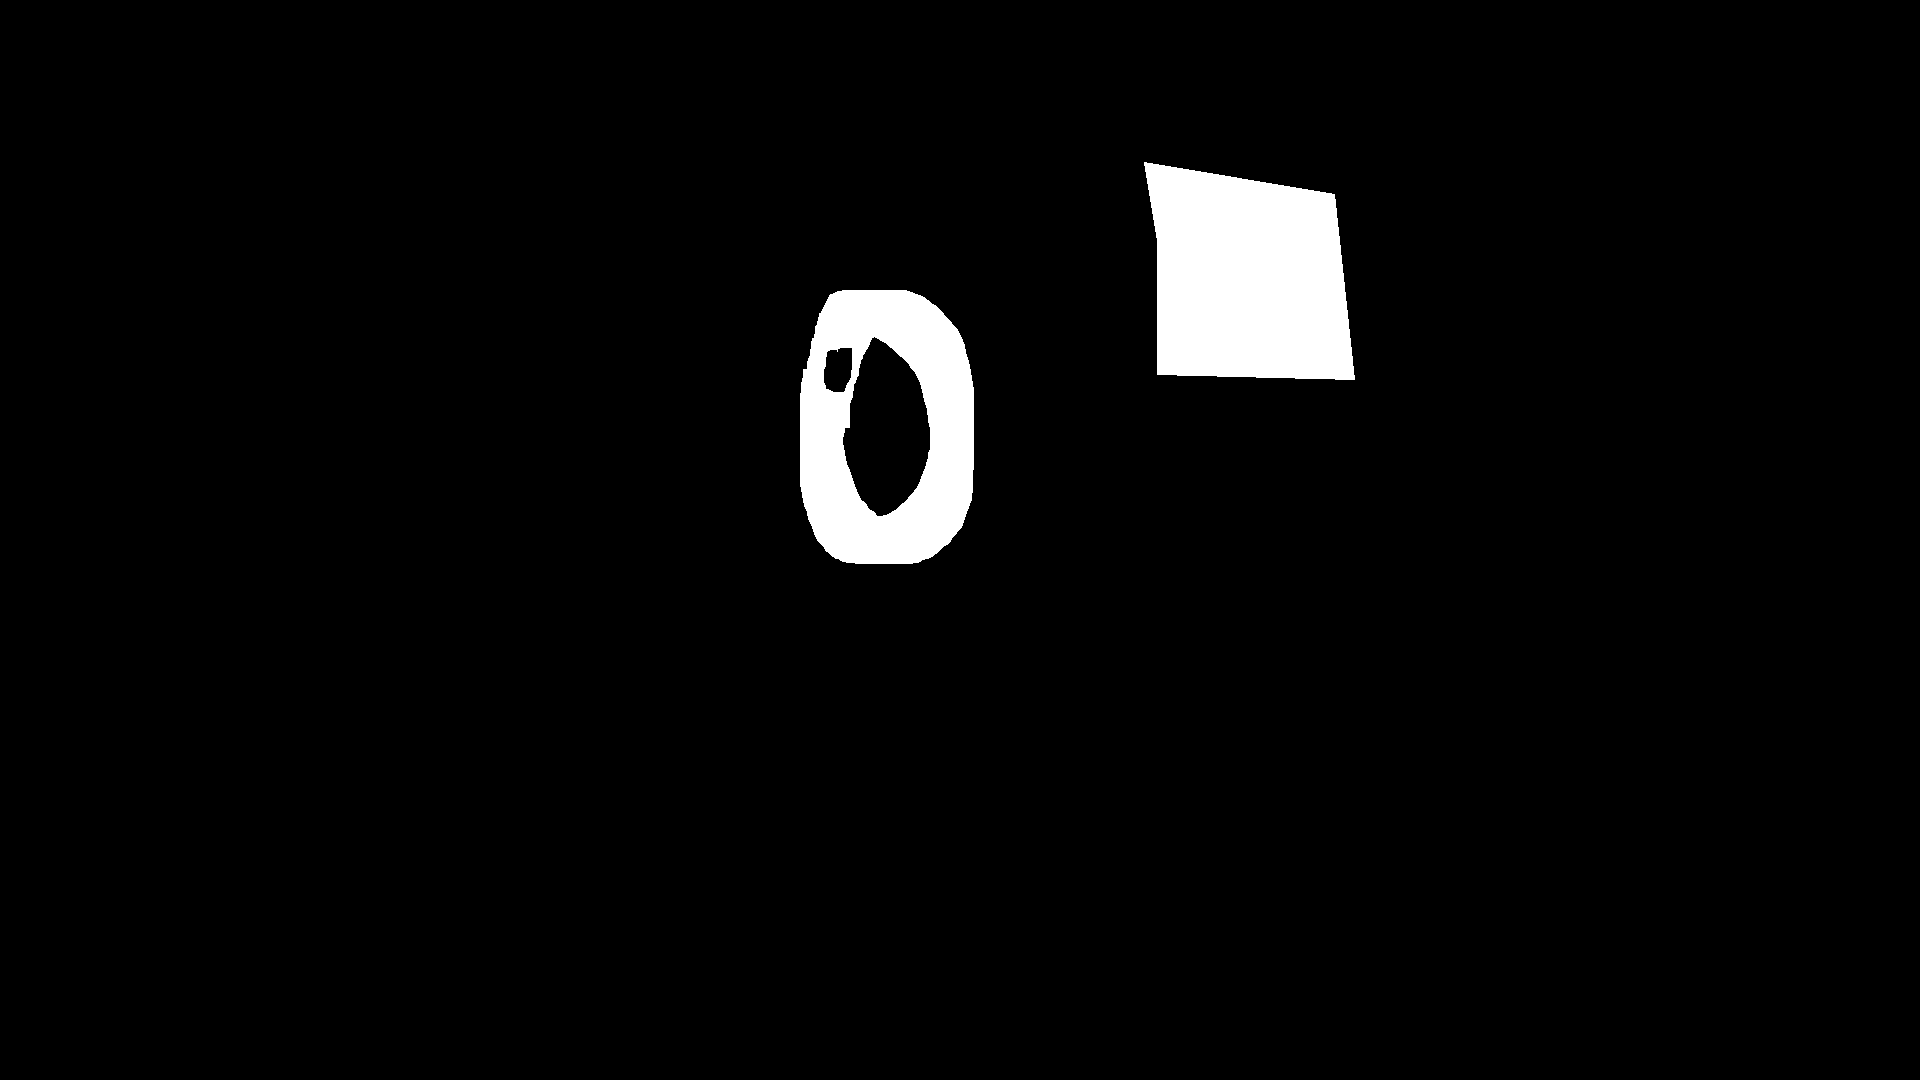

In [8]:
import cv2
import torch

a = [np.array(list(zip(map(int, map(round, s[0::2])), map(int, map(round, s[1::2]))))) for contour in segmentation for s in contour]
zeros = torch.zeros((1080, 1920)).numpy().astype(np.uint8)
mask = torch.from_numpy(
    cv2.drawContours(zeros, a, -1, (255, 255, 255), cv2.FILLED))
print(mask.size())
transforms.ToPILImage()(mask)